In [53]:
import pandas as pd
from pandas import DataFrame
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [54]:
df = pd.read_csv('memo5.csv')

In [55]:
df

,DATE,POILBREUSDM,EFFR
0,2001-01-01,25.790000,6.022857
1,2001-02-01,27.896500,5.508421
2,2001-03-01,25.034545,5.321429
3,2001-04-01,26.018095,4.813810
4,2001-05-01,28.438261,4.231818
...,...,...,...
273,2023-10-01,88.947727,5.330000
274,2023-11-01,82.186364,5.330000
275,2023-12-01,77.540952,5.330000
276,2024-01-01,79.110000,5.330000


Text(0.5, 0.98, 'Global Brent Price vs US Federal Funds Rate')

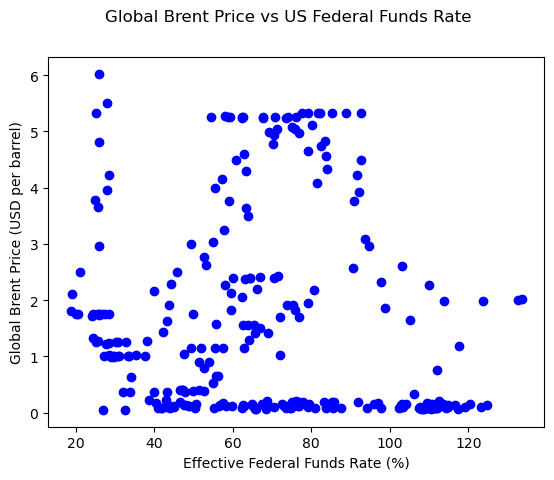

In [56]:
fedfund = df[['EFFR']]
brent = df[['POILBREUSDM']]

plt.scatter(brent,fedfund,c='b')
plt.xlabel('Effective Federal Funds Rate (%)')
plt.ylabel('Global Brent Price (USD per barrel)')
plt.suptitle('Global Brent Price vs US Federal Funds Rate')

In [57]:
from sklearn.model_selection import train_test_split

lr = LinearRegression(fit_intercept=False)

X_train, X_test, y_train, y_test = train_test_split(brent,fedfund,test_size=.2)

In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((222, 1), (56, 1), (222, 1), (56, 1))

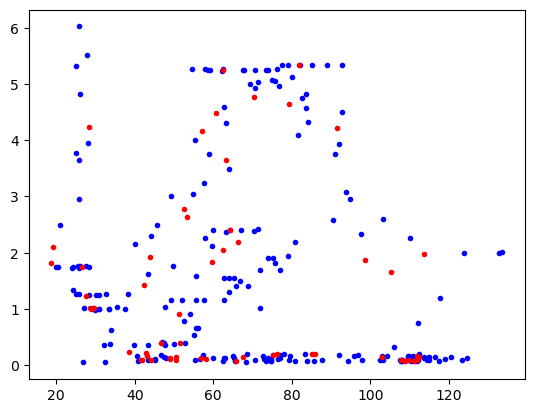

In [59]:
plt.plot(X_train, y_train, 'b.', X_test, y_test, 'r.')

In [60]:
lr.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [61]:
y_hat=lr.predict(X_test)

In [67]:
lr.score

-0.17120066992034655

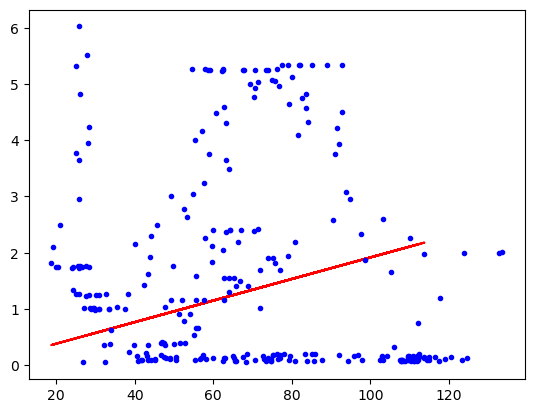

In [63]:
plt.plot(X_test,y_hat,'r-',brent,fedfund,'b.')

In [64]:
MSE = ((y_test - lr.predict(X_test)) ** 2).mean()
RMSE = np.sqrt(MSE)
print("MSE: ", MSE)
print("RMSE:", RMSE)

MSE:  EFFR    2.975092
dtype: float64
RMSE: EFFR    1.724845
dtype: float64


In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# Coefficients
print(f'Coefficients: {lr.coef_}')

# R^2 Score
print(f'R^2 score: {r2_score(y_test, y_hat)}')

# Mean Squared Error
mse = mean_squared_error(y_test, y_hat)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Coefficients: [[0.01916036]]
R^2 score: -0.17120066992034655
Mean Squared Error: 2.975091629365577
Root Mean Squared Error: 1.7248453928875993
